In [81]:
import numpy as np
import os
import random
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn import neural_network
from sklearn import linear_model

# Train test split 

In [73]:
img_folder = 'Q:/Personal/poze/ml_datra/sepia'

def split_files(folder_path, test_size = .2):
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    random.shuffle(files)
    
    train = files[:int(len(files) * (1- test_size))]
    test = files[int(len(files) * (1- test_size)):]
    
    return train, test

x_train_filenames, x_test_filenames = split_files(img_folder, test_size=.2)
    

# Filename -> image -> input

In [74]:
def load_images(filename_list, folder_path, size=(100, 100)):
    images = []
    for filename in filename_list:
        image = Image.open(
            os.path.join(folder_path, filename)
        )
        image = image.resize(size)
        image = image.convert('RGB')
        image_arr = np.array(image)
        images += [image_arr.flatten()]
        
    images_arr = np.array(images)
    return images_arr

x_train = load_images(x_train_filenames, img_folder)
y_train = ['sepia' in filename for filename in x_train_filenames]
x_test = load_images(x_test_filenames, img_folder)
y_test = ['sepia' in filename for filename in x_test_filenames]

# Normalise data

In [75]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
        
    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)  
    normalisedTestData = scaler.transform(testData) 
    
    return normalisedTrainData, normalisedTestData

x_train_norm, x_test_norm = normalisation(x_train, x_test)

# Train model

In [93]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.002 )
classifier.fit(x_train_norm, y_train)

Iteration 1, loss = 0.78826412
Iteration 2, loss = 0.57071700
Iteration 3, loss = 0.42040683
Iteration 4, loss = 0.32470185
Iteration 5, loss = 0.25782915
Iteration 6, loss = 0.21047544
Iteration 7, loss = 0.17710508
Iteration 8, loss = 0.15319179
Iteration 9, loss = 0.13542752
Iteration 10, loss = 0.12183703
Iteration 11, loss = 0.11022743
Iteration 12, loss = 0.09975184
Iteration 13, loss = 0.09050003
Iteration 14, loss = 0.08256402
Iteration 15, loss = 0.07564196
Iteration 16, loss = 0.06963145
Iteration 17, loss = 0.06431602
Iteration 18, loss = 0.05954356
Iteration 19, loss = 0.05529712
Iteration 20, loss = 0.05159506
Iteration 21, loss = 0.04830287
Iteration 22, loss = 0.04532254
Iteration 23, loss = 0.04266178
Iteration 24, loss = 0.04020715
Iteration 25, loss = 0.03796413
Iteration 26, loss = 0.03593693
Iteration 27, loss = 0.03408801
Iteration 28, loss = 0.03239720
Iteration 29, loss = 0.03085078
Iteration 30, loss = 0.02944814
Iteration 31, loss = 0.02815538
Iteration 32, los

MLPClassifier(learning_rate_init=0.002, max_iter=100, random_state=1,
              solver='sgd', verbose=10)

# Test model

In [94]:
y_predict = classifier.predict(x_test)

# Metrics

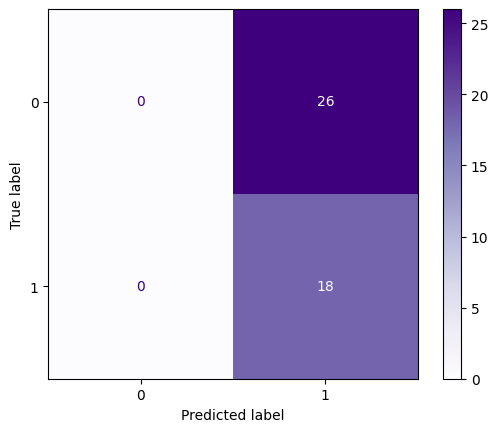

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        26
        True       0.41      1.00      0.58        18

    accuracy                           0.41        44
   macro avg       0.20      0.50      0.29        44
weighted avg       0.17      0.41      0.24        44


Q:\info\Python\lab7\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Q:\info\Python\lab7\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Q:\info\Python\lab7\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(
        y_test, y_predict
    )
).plot(cmap=plt.cm.Purples)
plt.show()

print(classification_report(y_test, y_predict))